# Estadísticas de comparación entre el gobierno de EPN y AMLO
    * Comparación de iniciativas aprobadas
    * Comparación de iniciativas desechadas
    * Por ley que modifica
    * Por partido
    * Temas de interes : {Constitución política de los estados unidos mexicanos y SAT}

Nombres: Anairam Mar, Francisco Calvillo, Luciano Montes, Santiago Delgado y Bruno Molina
    

# Librerias importadas

In [ ]:
! python3 -m pip install "pymongo[srv]"

In [ ]:
import requests
import pandas as pd
pd.set_option("max_rows", None)
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(18,10)})
import pymongo
from pymongo import MongoClient

# Credenciales privadas

In [ ]:
 with open('credentials.txt') as f:
    var = f.read()
client = var

# Borra la base de datos en caso de existir previamente

In [ ]:
myclient = pymongo.MongoClient(client)
myclient.drop_database("apilegislativo")

# Carga toda la información del Api Legislativo que vamos a usar en nuestro análisis

In [ ]:
payload={}
headers = {
    'Authorization': 'eyJraWQiOiIwbVhrbzR4bDBtOTFUOUMxaFNHbCtsZmJCY3VMdVVFQjFmQWxacUtMMFVNPSIsImFsZyI6IlJTMjU2In0.eyJhdF9oYXNoIjoieDVqYkR5WDlIblh4NnBxbmlCVzRYQSIsInN1YiI6IjBhMWQyYmM1LTJiMmMtNGU4MS04OTkwLTM1ZDFkZDc4YmU3YyIsImF1ZCI6IjUxMWN1YTRsdTRrYW9zdW9qZmo5NDhmOTB0IiwiZW1haWxfdmVyaWZpZWQiOmZhbHNlLCJldmVudF9pZCI6IjRjMDE5ZWU0LWRjODAtNGVjNy04ODBhLWI4OWJhYjQzMGRiOCIsInRva2VuX3VzZSI6ImlkIiwiYXV0aF90aW1lIjoxNjM3MTY1OTQxLCJpc3MiOiJodHRwczpcL1wvY29nbml0by1pZHAudXMtZWFzdC0xLmFtYXpvbmF3cy5jb21cL3VzLWVhc3QtMV9kUjNBWjhPMm8iLCJjb2duaXRvOnVzZXJuYW1lIjoiMGExZDJiYzUtMmIyYy00ZTgxLTg5OTAtMzVkMWRkNzhiZTdjIiwiZXhwIjoxNjM3MTgwMzQxLCJpYXQiOjE2MzcxNjU5NDEsImVtYWlsIjoiMDgwOWJydW5vQGdtYWlsLmNvbSJ9.jSItlLLNHfJvP3M2J_Vt8Ka3U1sZO6qmRZ_1itcRIcFsO0Lu56Y2dSFb2g7ZNEQzG45qYQ6J9K6e6hW4Go7H3H63bQP8IFFvrqCCVN8owBswgJx2iSu1-O-N88efvbCxZVDqcT7FjingTXnSnrWmD_HbGzuyhl22n8R2BMRz4kpJFFl_8jO_zDe_d9jrsk3Gpo6l9frHnShltGwJZmw-DccQ2NkRPSZEAsARdW_5-1dp_y-kr86eeU6Y0sxL2QI-JDKLjMbdofNdaCoY5L3P7sZqtBBdWskhhw3Co-74o9errhe5N5cSoS4FmSjs-rQY4LKVLimJNRRMFVjoZP3E7w'
}

#Importación a MongoDB Iniciativas aprobadas
url = "https://api.apilegislativo.com/iniciativa/aprobada/"


response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["iniciativasaprobadas"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"]) # find({"iniciativas:{$exists:true}"})

#Importación a MongoDB Iniciativas desechadas
url = "https://api.apilegislativo.com/iniciativa/desechada/"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["iniciativasdesechadas"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"]) 

#Importación a MongoDB Iniciativas por partido PAN
url = "https://api.apilegislativo.com/iniciativa/partido/pan"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["PAN"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"])

#Importación a MongoDB Iniciativas por partido PRI
url = "https://api.apilegislativo.com/iniciativa/partido/pri"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["PRI"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"]) 

#Importación a MongoDB Iniciativas por partido MORENA
url = "https://api.apilegislativo.com/iniciativa/partido/morena"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["MORENA"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"]) 

#Importación a MongoDB Iniciativas por partido PRD
url = "https://api.apilegislativo.com/iniciativa/partido/PRD"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["PRD"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"])

#Importación a MongoDB Iniciativas por partido MC
url = "https://api.apilegislativo.com/iniciativa/partido/mc"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["Movimiento_ciudadano"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"]) 

#Importación a MongoDB Iniciativas por partido PT
url = "https://api.apilegislativo.com/iniciativa/partido/pt"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["Partido_del_trabajo"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"]) 

#Importación a MongoDB Iniciativas por partido PVEM
url = "https://api.apilegislativo.com/iniciativa/partido/pvem"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["PVEM"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"]) 

#Importación a MongoDB Iniciativas por partido PES
url = "https://api.apilegislativo.com/iniciativa/partido/pes"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["PES"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"]) 

#Importación a MongoDB Iniciativas por partido SP
url = "https://api.apilegislativo.com/iniciativa/partido/sp"

response = requests.request("GET", url, headers=headers, data=payload)

myclient = pymongo.MongoClient(client) # similar a ejecutar mongosh
mydb = myclient["apilegislativo"] # == use apilegislativo
mycol = mydb["SP"] # == db.iniciativasaprobadas...
iniciativas = response.json()
x = mycol.insert_many(iniciativas["iniciativas"]) 

Cantidad de iniciativas aprobadas en el sexenio de Peña Nieto (01/DIC/2012-30/NOV/2018)

# Librerias

In [ ]:
import datetime as dt

Credenciales BD Apilegislativo - Table: iniciativasaprobadas

In [ ]:
client_cred = client

In [ ]:
client = MongoClient()

client = MongoClient(client_cred) 

mydatabase = client['apilegislativo']

mycollection=mydatabase['iniciativasaprobadas']

Credenciales BD Apilegislativo - Table: iniciativasrechazadas

In [ ]:
client_2=MongoClient()

client_2 = MongoClient(client_cred) 

mydatabase_2 = client['apilegislativo']

mycollection_2=mydatabase_2['iniciativasdesechadas']

# Primeras consultas

Cantidad de iniciativas aprobadas en el sexenio de Peña Nieto (01/DIC/2012-30/NOV/2018)

In [ ]:
agg_result_iniciativas_EPN= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}}]}},
    {"$count":"iniciativas_aprobadas"}
])
for i in agg_result_iniciativas_EPN:
    print (i)
    agg_result_iniciativas_EPN = i

{'iniciativas_aprobadas': 24}


Cantidad de iniciativas rechazadas en el sexenio de Peña Nieto (01/DIC/2012-30/NOV/2018)

In [ ]:
agg_result_desechadas_EPN= mycollection_2.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}}]}},
    {"$count":"iniciativas_desechadas"}
])
for i in agg_result_desechadas_EPN:
    print (i)
agg_result_desechadas_EPN = {'iniciativas_desechadas': 0}

Cantidad de iniciativas aprobadas en el sexenio de Andrés Manuel López Obrador (01/DIC/2018-30/11/2024)

In [ ]:
agg_result_iniciativas_AMLO= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}}]}},
    {"$count":"iniciativas_aprobadas"}
])
for i in agg_result_iniciativas_AMLO:
    print (i)
    agg_result_iniciativas_AMLO = i

{'iniciativas_aprobadas': 1535}


Cantidad de iniciativas desechadas en el sexenio de Andrés Manuel López Obrador (01/DIC/2018-30/11/2024)

In [ ]:
agg_result_desechadas_AMLO= mycollection_2.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}}]}},
    {"$count":"iniciativas_desechadas"}
])
for i in agg_result_desechadas_AMLO:
    print (i)
    agg_result_desechadas_AMLO = i

{'iniciativas_desechadas': 418}


# DataFrame comparativos

In [ ]:
var_1 = agg_result_iniciativas_EPN['iniciativas_aprobadas']
var_2 = agg_result_iniciativas_AMLO['iniciativas_aprobadas']

d = {'EPN': [var_1], 'AMLO': [var_2]}

data_frame_iniciativas_aprobadas = pd.DataFrame(d)
data_frame_iniciativas_aprobadas

,EPN,AMLO
0,24,1535


In [ ]:
var_1 = agg_result_desechadas_EPN['iniciativas_desechadas']
var_2 = agg_result_desechadas_AMLO['iniciativas_desechadas']

e = {'EPN': [var_1], 'AMLO': [var_2]}

data_frame_iniciativas_desechadas = pd.DataFrame(e)
data_frame_iniciativas_desechadas 

,EPN,AMLO
0,0,418


Cantidad de iniciativas en los cuatro trimestre del 2012-2013 de EPN

In [ ]:
lista_year = [[2012,2013],[2013,2013],[2013,2013],[2013,2013]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_EPN_2013 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_EPN_2013= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_EPN_2013:
        trimestres_EPN_2013.append(i)
print (trimestres_EPN_2013)  

[]


In [ ]:
columnas = ['trimestre_1_12-13','trimestre_2_12-13','trimestre_3_12-13','trimestre_4_12-13']

#Comentado para cuando esten los datos de EPN
#f = {}

#for i in range(len(trimestres_EPN_2013)):
  #var_aux = trimestres_EPN_2013[i]
  #f[columnas[i]] = [var_aux['iniciativas']]

f = {'trimestre_1_12-13':[0],'trimestre_2_12-13':[0],'trimestre_3_12-13':[0],'trimestre_4_12-13':[0]}

data_frame_trimestres_EPN_2013 = pd.DataFrame(f)
data_frame_trimestres_EPN_2013

,trimestre_1_12-13,trimestre_2_12-13,trimestre_3_12-13,trimestre_4_12-13
0,0,0,0,0


Cantidad de iniciativas en los cuatro trimestre del 2013-2014 de EPN

In [ ]:
lista_year = [[2013,2014],[2014,2014],[2014,2014],[2014,2014]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_EPN_2014 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_EPN_2014= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_EPN_2014:
        trimestres_EPN_2014.append(i)
print (trimestres_EPN_2014) 

[]


In [ ]:
columnas = ['trimestre_1_13-14','trimestre_2_13-14','trimestre_3_13-14','trimestre_4_13-14']

#Comentado para cuando esten los datos de EPN
#f = {}

#for i in range(len(trimestres_EPN_2014)):
  #var_aux = trimestres_EPN_2014[i]
  #f[columnas[i]] = [var_aux['iniciativas']]

f = {'trimestre_1_13-14':[0],'trimestre_2_13-14':[0],'trimestre_3_13-14':[0],'trimestre_4_13-14':[0]}

data_frame_trimestres_EPN_2014 = pd.DataFrame(f)
data_frame_trimestres_EPN_2014

,trimestre_1_13-14,trimestre_2_13-14,trimestre_3_13-14,trimestre_4_13-14
0,0,0,0,0


Cantidad de iniciativas en los cuatro trimestre del 2015 de EPN

In [ ]:
lista_year = [[2014,2015],[2015,2015],[2015,2015],[2015,2015]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_EPN_2015 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_EPN_2015= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_EPN_2015:
        trimestres_EPN_2015.append(i)
print (trimestres_EPN_2015) 

[]


In [ ]:
columnas = ['trimestre_1_14-15','trimestre_1_14-15','trimestre_1_14-15','trimestre_1_14-15']

#Comentado para cuando esten los datos de EPN
#f = {}

#for i in range(len(trimestres_EPN_2015)):
  #var_aux = trimestres_EPN_2015[i]
  #f[columnas[i]] = [var_aux['iniciativas']]

f = {'trimestre_1_14-15':[0],'trimestre_2_14-15':[0],'trimestre_3_14-15':[0],'trimestre_4_14-15':[0]}

data_frame_trimestres_EPN_2015 = pd.DataFrame(f)
data_frame_trimestres_EPN_2015

,trimestre_1_14-15,trimestre_2_14-15,trimestre_3_14-15,trimestre_4_14-15
0,0,0,0,0


Cantidad de iniciativas en los cuatro trimestres del 2019 de AMLO

In [ ]:
lista_year = [[2018,2019],[2019,2019],[2019,2019],[2019,2019]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_AMLO_2019 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_AMLO_2019= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_AMLO_2019:
        trimestres_AMLO_2019.append(i)
print (trimestres_AMLO_2019)  

[{'iniciativas': 30}, {'iniciativas': 139}, {'iniciativas': 12}, {'iniciativas': 298}]


In [ ]:
columnas = ['trimestre_1_18-19','trimestre_2_18-19','trimestre_3_18-19','trimestre_4_18-19']
f = {}

for i in range(len(trimestres_AMLO_2019)):
  var_aux = trimestres_AMLO_2019[i]
  f[columnas[i]] = [var_aux['iniciativas']]

data_frame_trimestres_AMLO_2019 = pd.DataFrame(f)
data_frame_trimestres_AMLO_2019


,trimestre_1_18-19,trimestre_2_18-19,trimestre_3_18-19,trimestre_4_18-19
0,30,139,12,298


Cantidad de iniciativas en los cuatro trimestres del 2020 de AMLO

In [ ]:
lista_year = [[2019,2020],[2020,2020],[2020,2020],[2020,2020]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [29,31,31,30]
trimestres_AMLO_2020 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_AMLO_2020= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_AMLO_2020:
        trimestres_AMLO_2020.append(i)
print (trimestres_AMLO_2020)

[{'iniciativas': 100}, {'iniciativas': 91}, {'iniciativas': 33}, {'iniciativas': 334}]


In [ ]:
columnas = ['trimestre_1_19-20','trimestre_2_19-20','trimestre_3_19-20','trimestre_4_19-20']
t = {}

for i in range(len(trimestres_AMLO_2020)):
  var_aux = trimestres_AMLO_2020[i]
  t[columnas[i]] = [var_aux['iniciativas']]

data_frame_trimestres_AMLO_2020 = pd.DataFrame(t)
data_frame_trimestres_AMLO_2020

,trimestre_1_19-20,trimestre_2_19-20,trimestre_3_19-20,trimestre_4_19-20
0,100,91,33,334


Cantidad de iniciativas en los cuatro trimestres del 2021 de EPN

In [ ]:
lista_year = [[2020,2021],[2021,2021],[2021,2021],[2021,2021]]
lista_meses = [[12,2],[3,5],[6,8],[9,11]]
lista_dias = [28,31,31,30]
trimestres_AMLO_2021 = []

for i in range(len(lista_meses)):
    var = lista_meses[i][0]
    var_2 = lista_meses[i][1]
    var_3 = lista_dias[i]
    var_4 = lista_year[i][0]
    var_5 = lista_year[i][1]
    primer_trimestre_AMLO_2021 = mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(var_4,var,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(var_5,var_2,var_3,0,0,0,0)}}]}},
    {"$count":"iniciativas"}
    ])
    for i in primer_trimestre_AMLO_2021:
        trimestres_AMLO_2021.append(i)
print (trimestres_AMLO_2021)

[{'iniciativas': 193}, {'iniciativas': 304}, {'iniciativas': 1}]


In [ ]:
columnas = ['trimestre_1_20-21','trimestre_2_20-21','trimestre_3_20-21']
r = {}

for i in range(len(trimestres_AMLO_2021)):
  var_aux = trimestres_AMLO_2021[i]
  r[columnas[i]] = [var_aux['iniciativas']]

data_frame_trimestres_AMLO_2021 = pd.DataFrame(r)
data_frame_trimestres_AMLO_2021

,trimestre_1_20-21,trimestre_2_20-21,trimestre_3_20-21
0,193,304,1


Credenciales BD Apilegislativo - Table: Iniciativas por partido

In [ ]:
client_3 = MongoClient()

client_3 = MongoClient(client_cred) 

mydatabase_3 = client['apilegislativo']

Cantidad de iniciativas aprobadas por partido en el sexenio de EPN

In [ ]:
lista_partidos = ['MORENA','Movimiento_ciudadano','PAN','Partido_del_trabajo','PES','PRD','PRI','PVEM','SP']
iniciativas_por_partido_aprobadas_EPN = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_EPN= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}},{"status":"Aprobada"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_EPN:
        iniciativas_por_partido_aprobadas_EPN.append(i)
print (iniciativas_por_partido_aprobadas_EPN)

[{'iniciativas': 16}, {'iniciativas': 6}, {'iniciativas': 8}, {'iniciativas': 4}, {'iniciativas': 11}, {'iniciativas': 2}, {'iniciativas': 4}, {'iniciativas': 3}, {'iniciativas': 14}]


In [ ]:
columnas = ['MORENA','Movimiento_ciudadano','PAN','Partido_del_trabajo','PES','PRD','PRI','PVEM','SP']
r = {}

for i in range(len(iniciativas_por_partido_aprobadas_EPN)):
  var_aux = iniciativas_por_partido_aprobadas_EPN[i]
  r[columnas[i]] = [var_aux['iniciativas']]

data_frame_iniciativas_por_partido_aprobadas_EPN = pd.DataFrame(r)
data_frame_iniciativas_por_partido_aprobadas_EPN


,MORENA,Movimiento_ciudadano,PAN,Partido_del_trabajo,PES,PRD,PRI,PVEM,SP
0,16,6,8,4,11,2,4,3,14


Cantidad de iniciativas desechadas por partido en el sexenio de EPN

In [ ]:
lista_partidos = ['MORENA','Movimiento_ciudadano','PAN','Partido_del_trabajo','PES','PRD','PRI','PVEM','SP']
iniciativas_por_partido_desechadas_EPN = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_EPN= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}},{"status":"Desechada"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_EPN:
        iniciativas_por_partido_desechadas_EPN.append([lista_partidos[j],i])
print (iniciativas_por_partido_desechadas_EPN)

[]


In [ ]:
columnas = ['MORENA','Movimiento_ciudadano','PAN','Partido_del_trabajo','PES','PRD','PRI','PVEM','SP']
# Comentado hasta obtener más información del sexenio de EPN
#r = {}

#for i in range(len(iniciativas_por_partido_aprobadas_EPN)):
  #var_aux = iniciativas_por_partido_aprobadas_EPN[i]
  #r[columnas[i]] = [var_aux['iniciativas']]

r = {'MORENA': [0],'Movimiento_ciudadano' : [0],'PAN' : [0],'Partido_del_trabajo' : [0],'PES' : [0],'PRD' : [0],'PRI' : [0],'PVEM' : [0],'SP' : [0]}

data_frame_iniciativas_por_partido_desechadas_EPN = pd.DataFrame(r)
data_frame_iniciativas_por_partido_desechadas_EPN

,MORENA,Movimiento_ciudadano,PAN,Partido_del_trabajo,PES,PRD,PRI,PVEM,SP
0,0,0,0,0,0,0,0,0,0


Cantidad de iniciativas aprobadas por partido en el sexenio de AMLO

In [ ]:
lista_partidos = ['MORENA','Movimiento_ciudadano','PAN','Partido_del_trabajo','PES','PRD','PRI','PVEM','SP']
iniciativas_por_partido_aprobadas_AMLO = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_AMLO= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}},{"status":"Aprobada"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_AMLO:
        iniciativas_por_partido_aprobadas_AMLO.append(i)
print (iniciativas_por_partido_aprobadas_AMLO)

[{'iniciativas': 590}, {'iniciativas': 193}, {'iniciativas': 346}, {'iniciativas': 50}, {'iniciativas': 131}, {'iniciativas': 112}, {'iniciativas': 241}, {'iniciativas': 140}, {'iniciativas': 154}]


In [ ]:
columnas = ['MORENA','Movimiento_ciudadano','PAN','Partido_del_trabajo','PES','PRD','PRI','PVEM','SP']
r = {}

for i in range(len(iniciativas_por_partido_aprobadas_AMLO)):
  var_aux = iniciativas_por_partido_aprobadas_AMLO[i]
  r[columnas[i]] = [var_aux['iniciativas']]

data_frame_iniciativas_por_partido_aprobadas_AMLO = pd.DataFrame(r)
data_frame_iniciativas_por_partido_aprobadas_AMLO

,MORENA,Movimiento_ciudadano,PAN,Partido_del_trabajo,PES,PRD,PRI,PVEM,SP
0,590,193,346,50,131,112,241,140,154


Cantidad de iniciativas desechadas por partido en el sexenio de AMLO

In [ ]:
lista_partidos = ['MORENA','Movimiento_ciudadano','PAN','Partido_del_trabajo','PES','PRD','PRI','PVEM','SP']
iniciativas_por_partido_desechadas_AMLO = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_AMLO= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}},{"status":"Desechada"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_AMLO:
        iniciativas_por_partido_desechadas_AMLO.append(i)
print (iniciativas_por_partido_desechadas_AMLO)

[{'iniciativas': 187}, {'iniciativas': 73}, {'iniciativas': 91}, {'iniciativas': 19}, {'iniciativas': 33}, {'iniciativas': 33}, {'iniciativas': 42}, {'iniciativas': 44}, {'iniciativas': 87}]


In [ ]:
columnas = ['MORENA','Movimiento_ciudadano','PAN','Partido_del_trabajo','PES','PRD','PRI','PVEM','SP']
r = {}

for i in range(len(iniciativas_por_partido_desechadas_AMLO)):
  var_aux = iniciativas_por_partido_desechadas_AMLO[i]
  r[columnas[i]] = [var_aux['iniciativas']]

data_frame_iniciativas_por_partido_desechadas_AMLO = pd.DataFrame(r)
data_frame_iniciativas_por_partido_desechadas_AMLO

,MORENA,Movimiento_ciudadano,PAN,Partido_del_trabajo,PES,PRD,PRI,PVEM,SP
0,187,73,91,19,33,33,42,44,87


Cantidad de iniciativas pendientes por partido en el sexenio de AMLO

In [ ]:
lista_partidos = ['MORENA','Movimiento_ciudadano','PAN','Partido_del_trabajo','PES','PRD','PRI','PVEM','SP']
iniciativas_por_partido_pendientes_AMLO = []

for j in range(len(lista_partidos)):
    mycollection_3 = mydatabase_3[lista_partidos[j]]
    agg_result_partido_AMLO= mycollection_3.aggregate([
        {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
        {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}},{"status":"Pendiente"}]}},
        {"$count":"iniciativas"}
    ])
    for i in agg_result_partido_AMLO:
        iniciativas_por_partido_pendientes_AMLO.append(i)
print (iniciativas_por_partido_pendientes_AMLO)

[{'iniciativas': 1}]


In [ ]:
columnas = ['PAN']

data_frame_iniciativas_por_partido_pendientes_AMLO = pd.DataFrame(iniciativas_por_partido_pendientes_AMLO,columnas)
data_frame_iniciativas_por_partido_pendientes_AMLO

,iniciativas
PAN,1


> En las iniciativas pendientes, la mayoría tiene status_date null, por lo tanto, solo sale 1.

Cantidad de iniciativas aprobadas por ley que modifican en el sexenio de EPN

In [ ]:
lista_EPN_por_ley_modificada = []

agg_result_EPN_por_ley_modificada= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2012,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2018,11,30,0,0,0,0)}}]}},
    {"$group": {"_id":"$laws_mod","Conteo":{"$sum": 1}}},
])
for i in agg_result_EPN_por_ley_modificada:
    lista_EPN_por_ley_modificada.append(i)
print (lista_EPN_por_ley_modificada)

[{'_id': 'Ley del Instituto de Seguridad y Servicios Sociales de los Trabajadores del EstadoLey del Seguro Social', 'Conteo': 1}, {'_id': 'Ley de Planeación', 'Conteo': 1}, {'_id': 'Ley del Mercado de Valores', 'Conteo': 1}, {'_id': 'ley de premios, estímulos y recompensas civiles', 'Conteo': 2}, {'_id': 'ley orgánica de la administración pública federal', 'Conteo': 6}, {'_id': 'ley sobre el escudo, la bandera y el himno nacionales', 'Conteo': 1}, {'_id': 'Código Fiscal de la Federación', 'Conteo': 1}, {'_id': 'constitución política de los estados unidos mexicanos', 'Conteo': 4}, {'_id': 'Expedición de Nueva Ley', 'Conteo': 2}, {'_id': 'Ley del Servicio de Administración Tributaria', 'Conteo': 1}, {'_id': 'código penal federal', 'Conteo': 2}, {'_id': 'ley del instituto nacional de pueblos indígenas y abroga la ley de la comisión nacional para el desarrollo de los pueblos indígenas', 'Conteo': 2}]


In [ ]:
data_frame_lista_EPN_por_ley_modificada = pd.DataFrame(lista_EPN_por_ley_modificada)
data_frame_lista_EPN_por_ley_modificada.rename(columns={"_id": "ley_que_modifica", "Conteo": "Cantidad_iniciativas_aprobadas_sexenio_EPN"}, inplace=True)
data_frame_lista_EPN_por_ley_modificada

,ley_que_modifica,Cantidad_iniciativas_aprobadas_sexenio_EPN
0,Ley del Instituto de Seguridad y Servicios Soc...,1
1,Ley de Planeación,1
2,Ley del Mercado de Valores,1
3,"ley de premios, estímulos y recompensas civiles",2
4,ley orgánica de la administración pública federal,6
5,"ley sobre el escudo, la bandera y el himno nac...",1
6,Código Fiscal de la Federación,1
7,constitución política de los estados unidos me...,4
8,Expedición de Nueva Ley,2
9,Ley del Servicio de Administración Tributaria,1


Cantidad de iniciativas aprobadas de ley que modifican en el sexenio de AMLO

In [ ]:
lista_AMLO_por_ley_modificada = []

agg_result_AMLO_por_ley_modificada= mycollection.aggregate([
    {"$addFields": {"status_date": { "$toDate": "$status_date"}}},
    {"$match":{"$and": [{"status_date" :{ "$gte": dt.datetime(2018,12,1,0,0,0,0)}},{"status_date": {"$lte": dt.datetime(2024,11,30,0,0,0,0)}}]}},
    {"$group": {"_id":"$laws_mod","Conteo":{"$sum": 1}}},
])
for i in agg_result_AMLO_por_ley_modificada:
    lista_AMLO_por_ley_modificada.append(i)
print (lista_AMLO_por_ley_modificada)

[{'_id': 'Ley Federal de Cinematografía', 'Conteo': 1}, {'_id': 'ley general de población y de la ley de nacionalidad', 'Conteo': 1}, {'_id': 'ley general de educación, en materia de educación a distancia', 'Conteo': 1}, {'_id': 'Ley del Seguro Social', 'Conteo': 1}, {'_id': 'ley general de cultura física y deporte', 'Conteo': 21}, {'_id': 'constitución política de los estados unidos mexicanos', 'Conteo': 48}, {'_id': 'ley del impuesto sobre la renta, en materia de impulso a la inversión en zonas marginadas', 'Conteo': 1}, {'_id': 'Ley Federal Sobre Metrología y NormalizaciónExpedición de Nueva Ley', 'Conteo': 1}, {'_id': 'ley federal de remuneraciones de los servidores públicos, reglamentaria de los artículos 75 y 127 de la constitución política de los estados unidos mexicanos, de la ley general de responsabilidades administrativas y del código penal federal', 'Conteo': 2}, {'_id': 'ley del impuesto al valor agregado; y se modifica la fracción xvi del artículo 34 de la ley del impuest

In [ ]:
data_frame_lista_AMLO_por_ley_modificada = pd.DataFrame(lista_AMLO_por_ley_modificada)
data_frame_lista_AMLO_por_ley_modificada.rename(columns={"_id": "ley_que_modifica", "Conteo": "Cantidad_iniciativas_aprobadas_sexenio_AMLO"}, inplace=True)
data_frame_lista_AMLO_por_ley_modificada

,ley_que_modifica,Cantidad_iniciativas_aprobadas_sexenio_AMLO
0,Ley Federal de Cinematografía,1
1,ley general de población y de la ley de nacion...,1
2,"ley general de educación, en materia de educac...",1
3,Ley del Seguro Social,1
4,ley general de cultura física y deporte,21
5,constitución política de los estados unidos me...,48
6,"ley del impuesto sobre la renta, en materia de...",1
7,Ley Federal Sobre Metrología y NormalizaciónEx...,1
8,ley federal de remuneraciones de los servidore...,2
9,ley del impuesto al valor agregado; y se modif...,1


# Gráficas


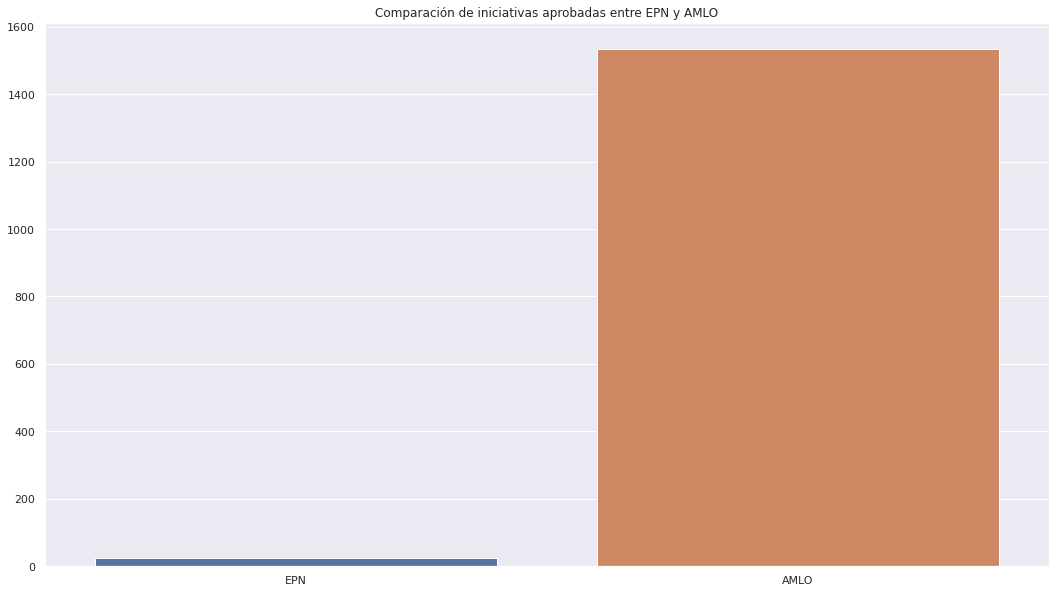

In [ ]:
ax = sns.barplot(data=data_frame_iniciativas_aprobadas)
ax.set_title("Comparación de iniciativas aprobadas entre EPN y AMLO")
ax

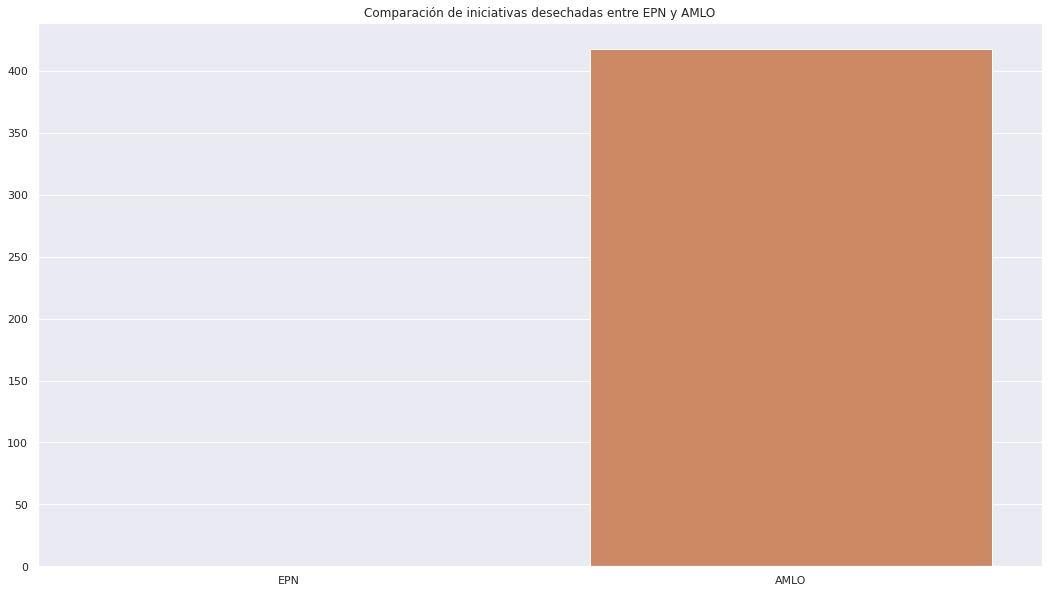

In [ ]:
bx = sns.barplot(data=data_frame_iniciativas_desechadas)
bx.set_title("Comparación de iniciativas desechadas entre EPN y AMLO")
bx

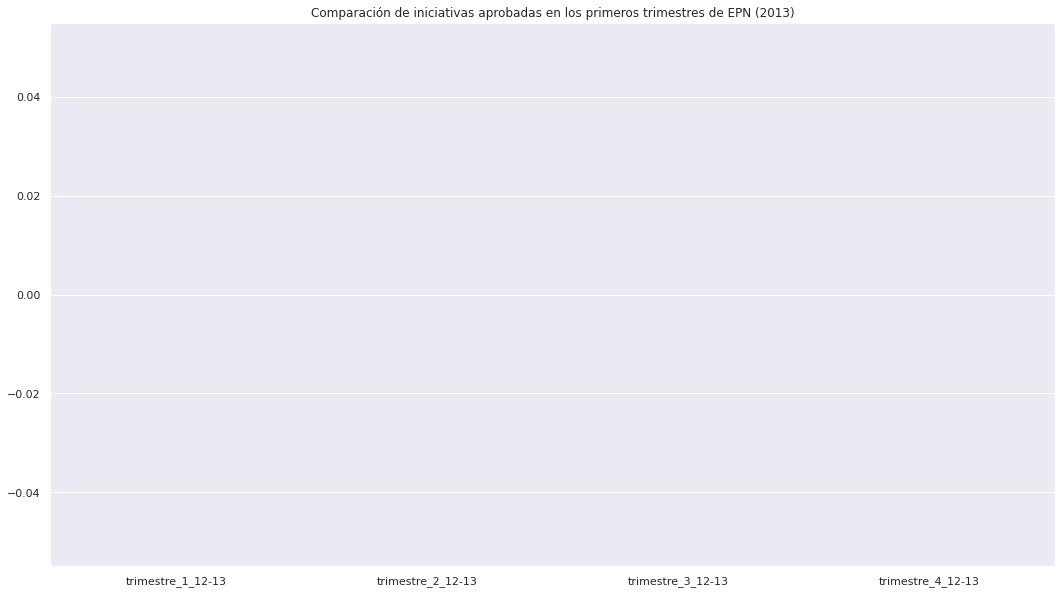

In [ ]:
bx = sns.barplot(data=data_frame_trimestres_EPN_2013)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de EPN (2013)")
bx

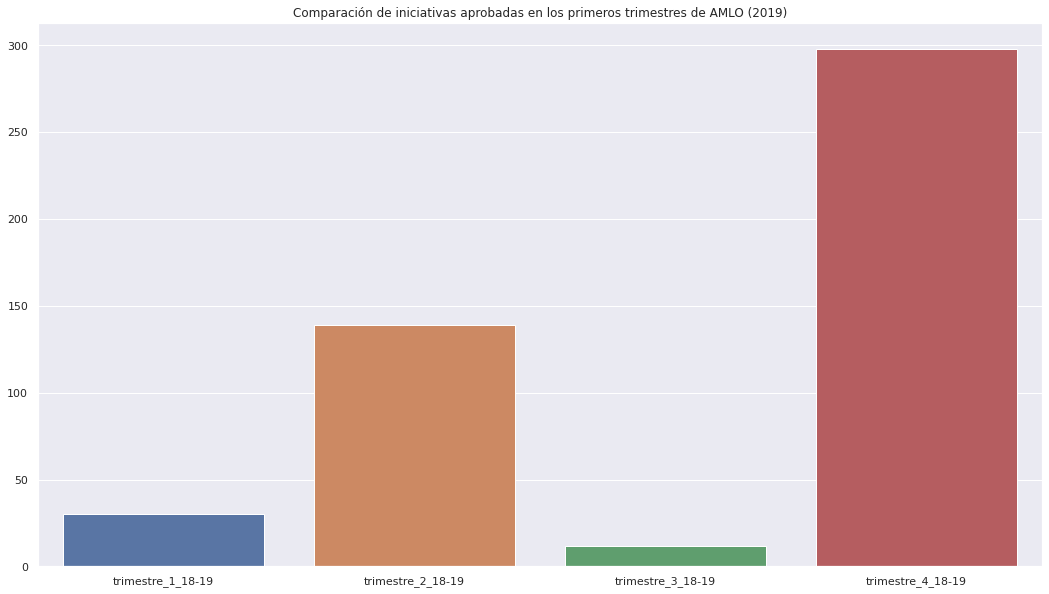

In [ ]:
bx = sns.barplot(data=data_frame_trimestres_AMLO_2019)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de AMLO (2019)")
bx

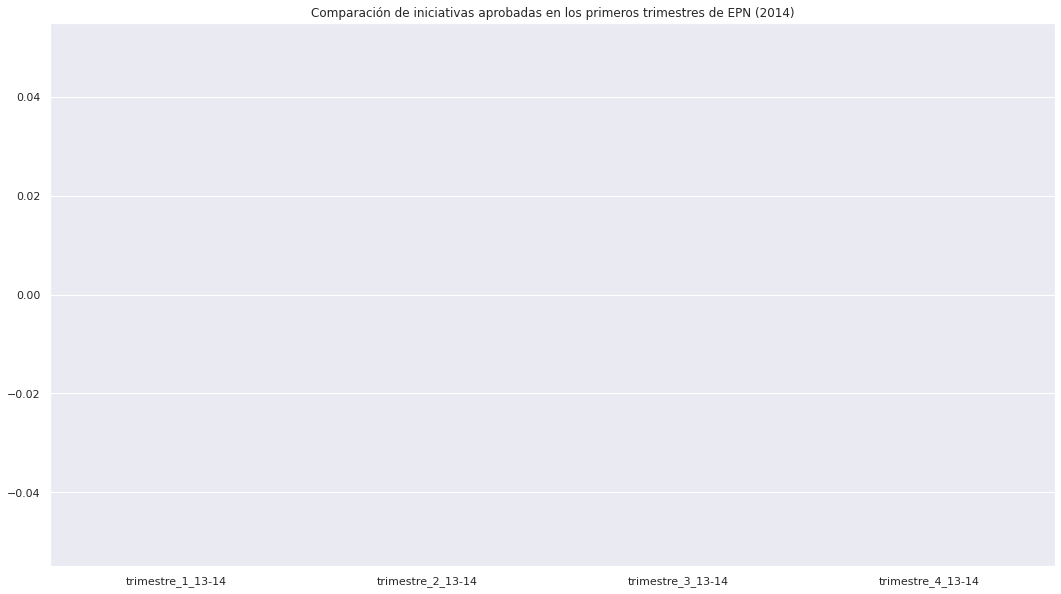

In [ ]:
bx = sns.barplot(data=data_frame_trimestres_EPN_2014)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de EPN (2014)")
bx

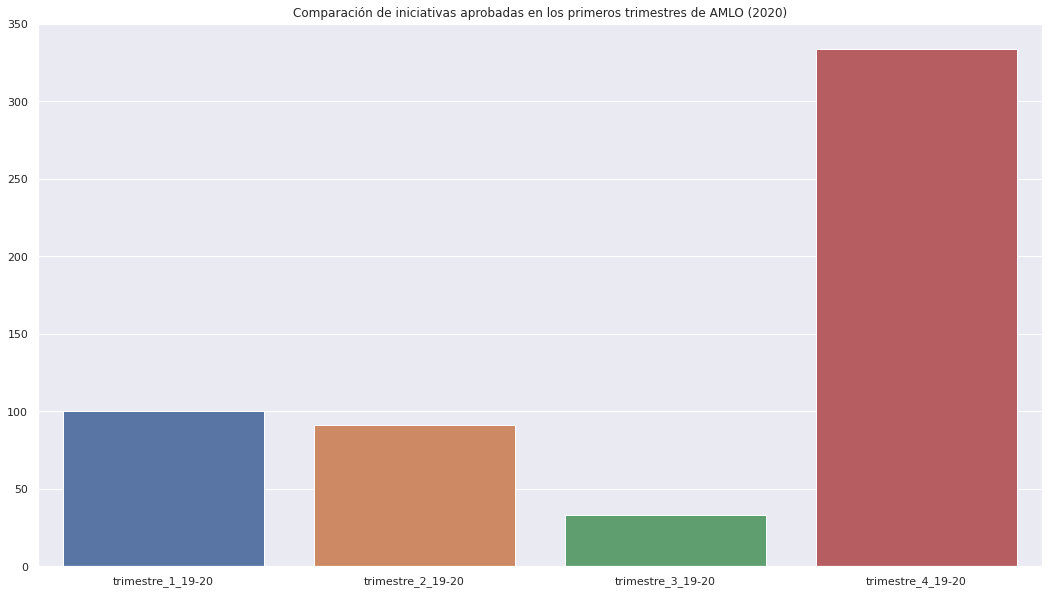

In [ ]:
bx = sns.barplot(data=data_frame_trimestres_AMLO_2020)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de AMLO (2020)")
bx

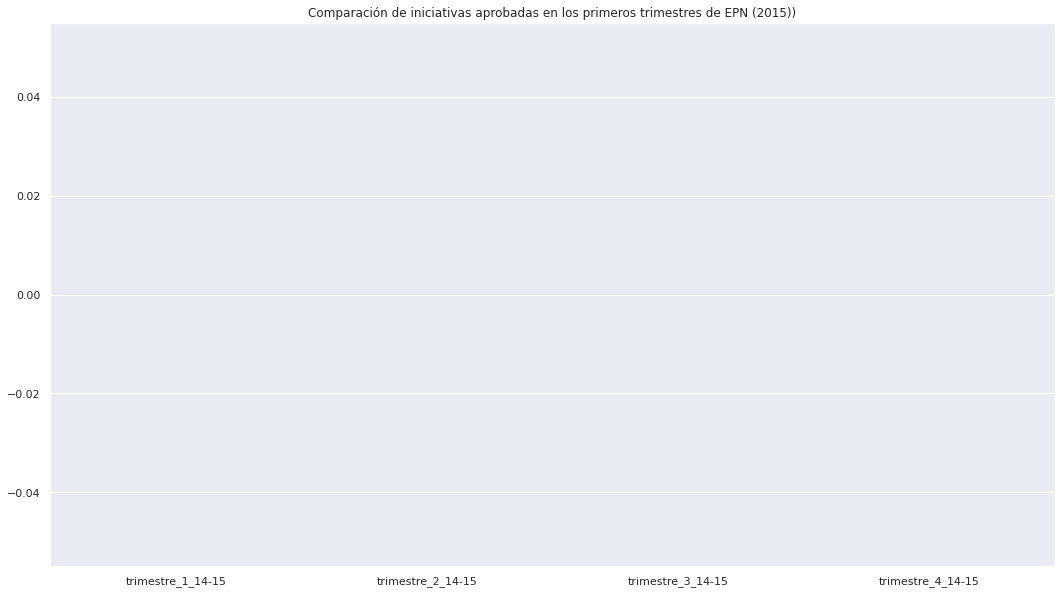

In [ ]:
bx = sns.barplot(data=data_frame_trimestres_EPN_2015)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de EPN (2015))")
bx

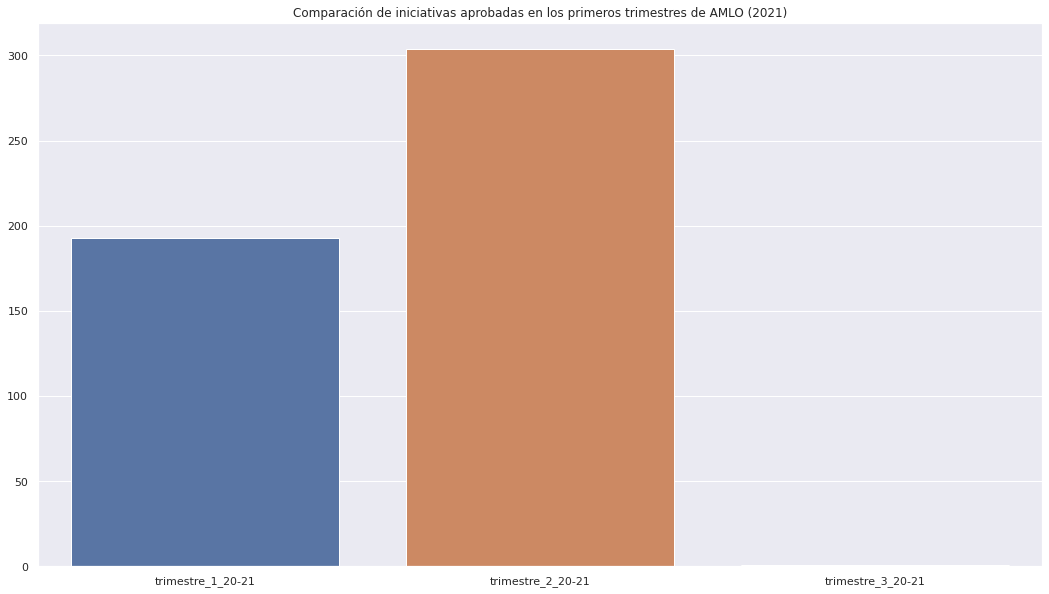

In [ ]:
bx = sns.barplot(data=data_frame_trimestres_AMLO_2021)
bx.set_title("Comparación de iniciativas aprobadas en los primeros trimestres de AMLO (2021)")
bx

> Solo existe 1 registro el trimestre_3_20-21

# NOTA

Las iniciativas aprobadas por los partidos, en ocasiones, son parte de coalisiones. Por lo que, puede que esten repetidas para cada partido que es parte de la coalisión.

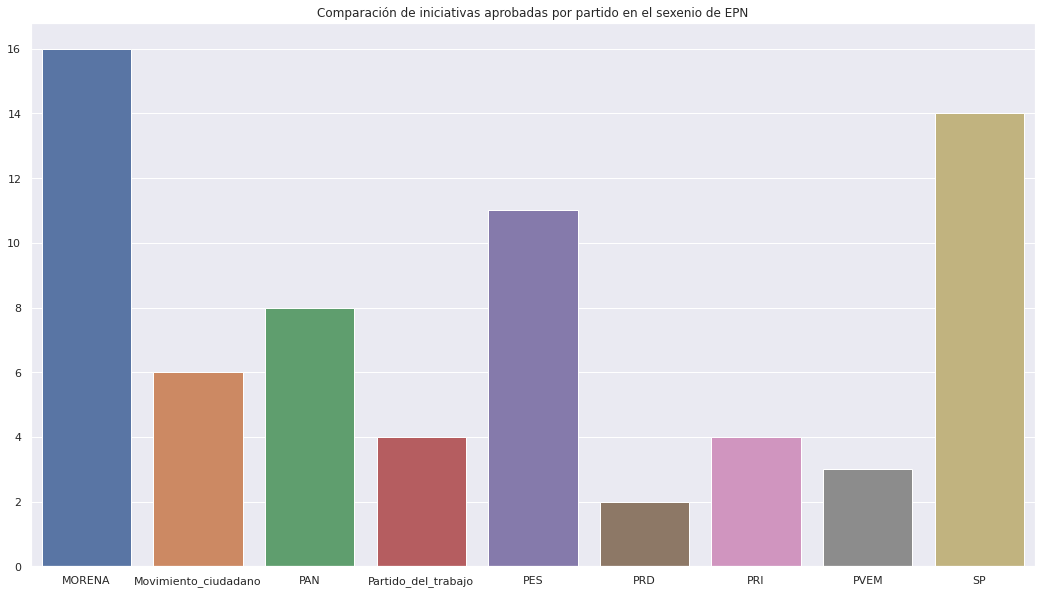

In [ ]:
bx = sns.barplot(data=data_frame_iniciativas_por_partido_aprobadas_EPN)
bx.set_title("Comparación de iniciativas aprobadas por partido en el sexenio de EPN")
bx

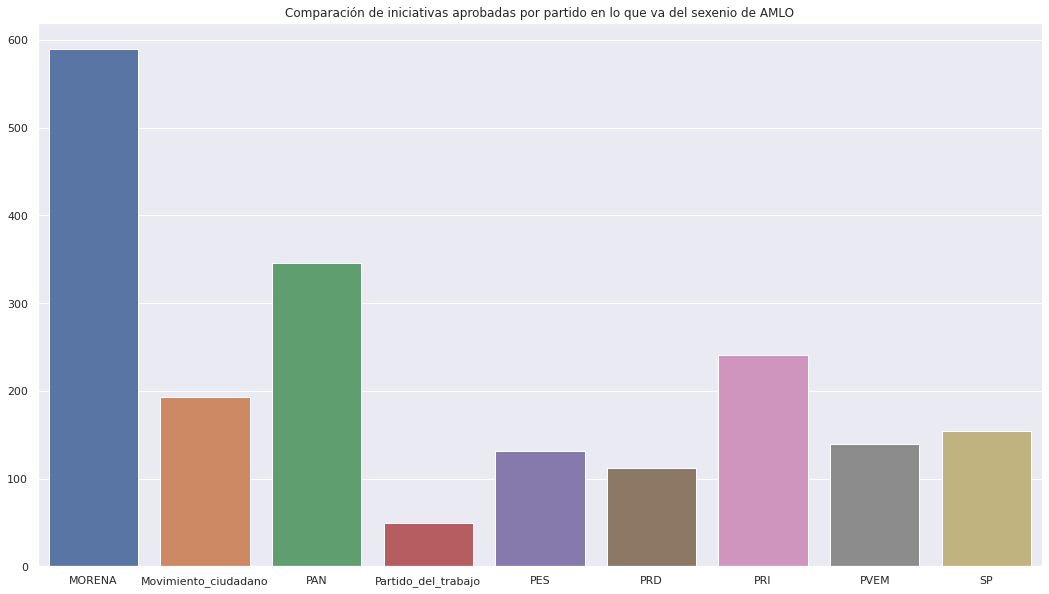

In [ ]:
bx = sns.barplot(data=data_frame_iniciativas_por_partido_aprobadas_AMLO)
bx.set_title("Comparación de iniciativas aprobadas por partido en lo que va del sexenio de AMLO")
bx

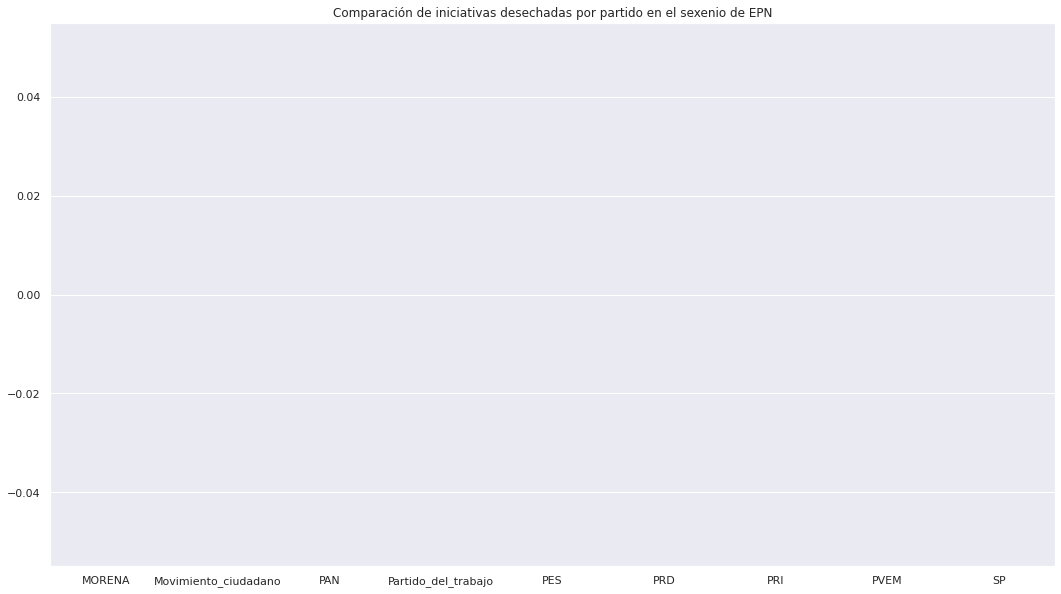

In [ ]:
bx = sns.barplot(data=data_frame_iniciativas_por_partido_desechadas_EPN)
bx.set_title("Comparación de iniciativas desechadas por partido en el sexenio de EPN")
bx

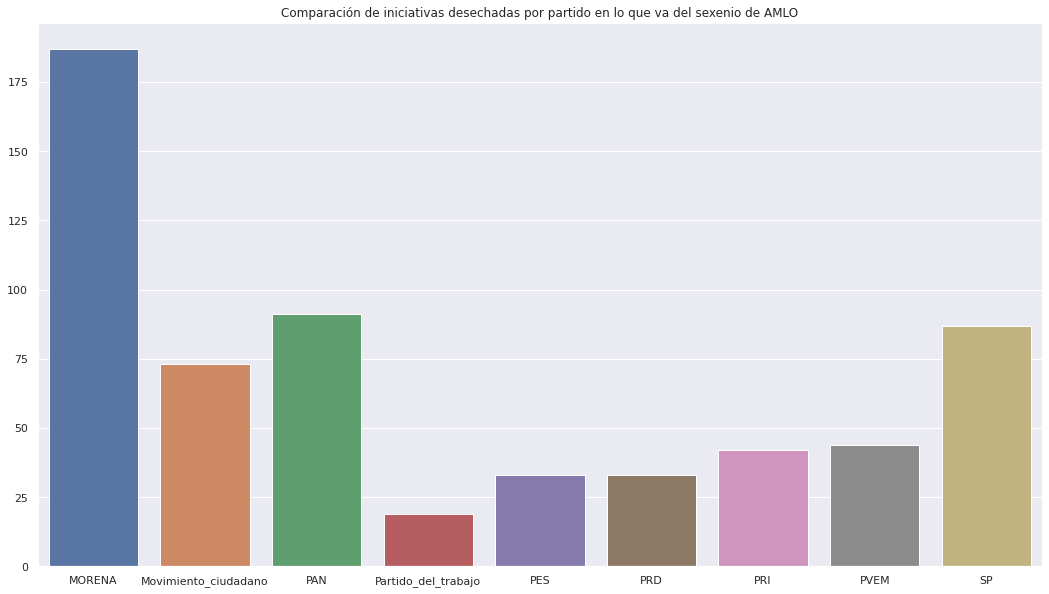

In [ ]:
bx = sns.barplot(data=data_frame_iniciativas_por_partido_desechadas_AMLO)
bx.set_title("Comparación de iniciativas desechadas por partido en lo que va del sexenio de AMLO")
bx

# Term Frequency / Inverse Document Frequency


# Combinaciones

  ## Pobreza
  [Pobreza, Desvíos, Recursos, Intermediarios, Vivienda, Salario, Alimentación, Extrema]

  Explicación: El tema de pobreza durante la campaña política de AMLO fue uno de los temas de mayor recurrencia en su discurso político. Por esa razón, consideramos importante analizar las iniciativas a través de palabras clave, que nos permitan conocer si las propuestas de AMLO están verdaderamente orientadas a dar soluciones a este tema. 

  ## Corrupción
  [Neoliberalismo, Impunidad, Engaño, Robo, Castigo, Narcotráfico, Drogas, Lavado, 4T, Pasado]

  Explicación: El tema de corrupción fue el estandarte en la campaña presidencial de AMLO. Cuando habla de la corrupción, está dispuesto a castigar a familiares y amigos. Lo cual nos pareció importante, porque, no había existido ningún presidente que estuviera dispuesto a castigar a los suyos.
    